<a href="https://colab.research.google.com/github/Abhishek3102/OpenCV/blob/main/CV_4_Histogram_Strectching_and_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1D Array Shape: (50400,)


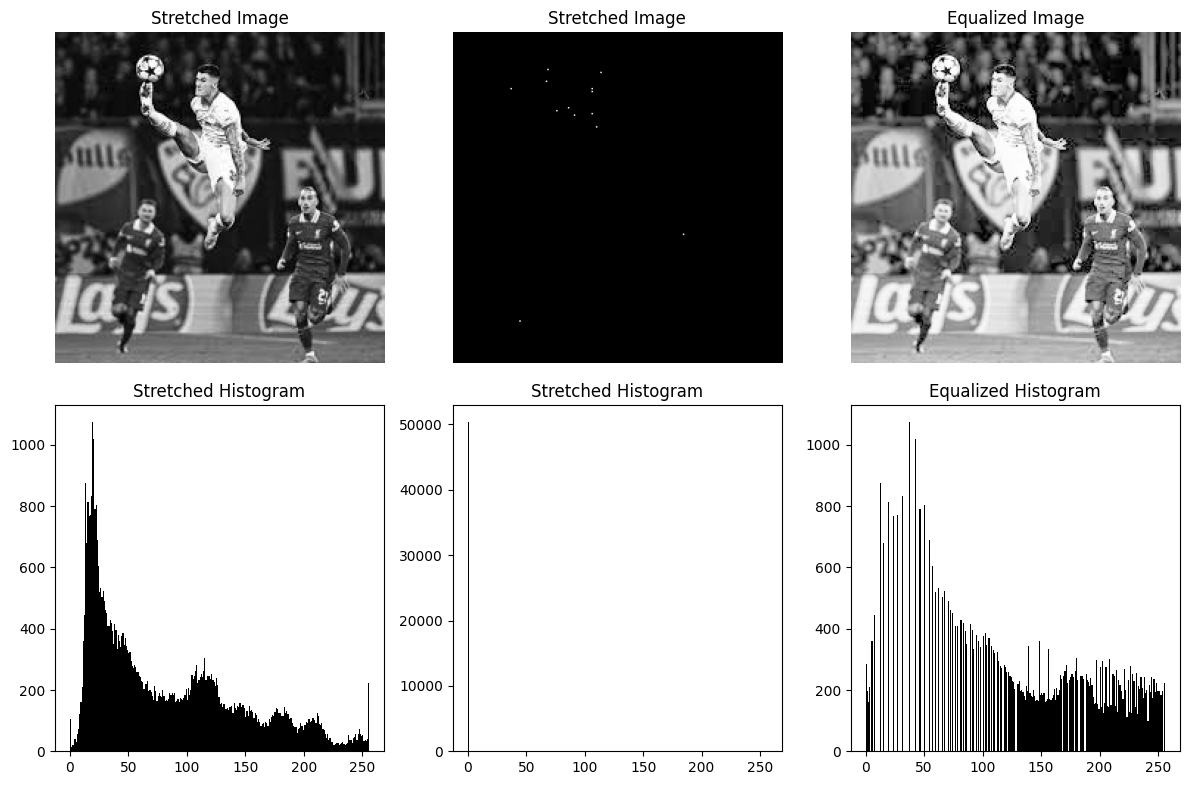

In [ ]:
# Step 1: Import necessary libraries
import cv2  # OpenCV for image loading and processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting histograms and images

# Step 2: Function to load an image (grayscale) from a given path
def load_image(image_path):
    """
    Load an image in grayscale mode.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
    return image

# Step 3: Function for Histogram Stretching (Contrast Stretching)
def histogram_stretching(image):
    """
    Perform histogram stretching to enhance contrast.
    """
    rmin = np.min(image)  # Minimum pixel value
    rmax = np.max(image)  # Maximum pixel value

    smin, smax = 0, 255  # Output dynamic range

    # Apply linear transformation formula for stretching
    stretched_image = ((image - rmin) * (smax - smin)) / (rmax - rmin) + smin
    stretched_image = np.uint8(stretched_image)  # Convert to uint8
    return stretched_image

# Step 4: Function for Histogram Equalization
def histogram_equalization(image):
    """
    Perform histogram equalization to spread pixel intensities uniformly.
    """
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])  # Histogram of the image
    cdf = hist.cumsum()  # CDF of the histogram

    # Normalize the CDF
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Map original image pixel values to equalized values using the CDF
    equalized_image = cdf[image]
    return equalized_image

# Step 5: Function to plot images and histograms
def plot_histograms_and_images(original, stretched, equalized):
    """
    Display images and their histograms for comparison.
    """
    plt.figure(figsize=(12, 8))

    # Display original, stretched, and equalized images
    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Stretched Image")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(stretched, cmap='gray')
    plt.title("Stretched Image")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(equalized, cmap='gray')
    plt.title("Equalized Image")
    plt.axis('off')

    # Plot histograms using keyword for 'range' to avoid deprecation warning
    plt.subplot(2, 3, 4)
    plt.hist(original.flatten(), bins=256, range=(0, 256), color='black')
    plt.title("Stretched Histogram")

    plt.subplot(2, 3, 5)
    plt.hist(stretched.flatten(), bins=256, range=(0, 256), color='black')
    plt.title("Stretched Histogram")

    plt.subplot(2, 3, 6)
    plt.hist(equalized.flatten(), bins=256, range=(0, 256), color='black')
    plt.title("Equalized Histogram")

    plt.tight_layout()
    plt.show()


# Step 6: Main function to run the experiment
def main(image_path):
    """
    Load the image, apply histogram stretching and equalization, and plot results.
    """
    image = load_image(image_path)  # Load the grayscale image

    image_1d = image.ravel()  # Convert the image to a 1D array
    print("1D Array Shape:", image_1d.shape)  # Print 1D array shape

    # Apply histogram stretching and equalization
    stretched_image = histogram_stretching(image)
    equalized_image = histogram_equalization(image)

    # Plot the results
    plot_histograms_and_images(image, stretched_image, equalized_image)

# Step 7: Run the experiment
if __name__ == "__main__":
    main("/content/sesko.jpg")